In [1]:
import dataclasses

from typing import Optional
import pickle
import warnings

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# fname = "./generated_dataset/sb3_generated_trajectories/maze2d_traj.pkl"
fname = "./generated_dataset/sb3_generated_trajectories/maze2d_timelimit_traj.pkl"

# Plot

In [3]:
def visualize_path_ant(data=None, goal=[0, 8]):
    """ """
    fig = plt.figure()
    offset = -2
    size = 0.25 + 2 * 0.08
    scaling = 4
    # path
    if data is not None:
        plt.plot(data[:, 0], data[:, 1], "o-")
        plt.plot(
            data[0, 0],
            data[0, 1],
            "go",
            markersize=10,
            markeredgecolor="k",
            label="start",
        )
        plt.plot(
            data[-1, 0],
            data[-1, 1],
            "ro",
            markersize=10,
            markeredgecolor="k",
            label="achieved goal",
        )
        # achived goal with radius
        achieved_circle = plt.Circle(
            xy=(data[-1, 0], data[-1, 1]),
            radius=0.1,
            color="r",
            lw=1,
            label="achieved region",
        )
        plt.gca().add_patch(achieved_circle)

    # goal pos
    plt.plot(
        goal[0], goal[1], "bo", markersize=10, markeredgecolor="k", label="desired goal"
    )
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1,
        label="goal region",
    )
    plt.gca().add_patch(goal_region)

    # UMaze boundary
    UMaze_x = np.array([0, 3, 3, 0, 0, 2, 2, 0, 0]) * scaling + offset
    UMaze_y = np.array([0, 0, 3, 3, 2, 2, 1, 1, 0]) * scaling + offset
    plt.plot(UMaze_x, UMaze_y, "r")

    # feasible region
    UMaze_feasible_x = UMaze_x + size * np.array([1, -1, -1, 1, 1, 1, 1, 1, 1])
    UMaze_feasible_y = UMaze_y + size * np.array([1, 1, -1, -1, 1, 1, -1, -1, 1])
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")

    plt.legend()
    plt.grid()

In [4]:
def visualize_path_point(data, goal, save=False):
    """"""
    fig = plt.figure()
    offset = 0.3
    size = 0.1
    
    # path
    plt.plot(data[:, 0], data[:, 1], "x-")

    plt.plot(
        data[0, 0],
        data[0, 1],
        "go",
        markersize=10,
        markeredgecolor="k", 
        label="start"
    )
    plt.plot(
        data[-1, 0],
        data[-1, 1],
        "ro",
        markersize=10,
        markeredgecolor="k",
        label="achieved goal",
    )
    plt.plot(
        goal[0],
        goal[1],
        "bo",
        markersize=10,
        markeredgecolor="k",
        label="desired goal"
    )

    # UMaze boundary
    UMaze_x = np.array([0., 1., 1., 2., 2., 3., 3., 0., 0.]) + offset
    UMaze_y = np.array([0., 0., 2., 2., 0., 0., 3., 3., 0.]) + offset
    plt.plot(UMaze_x, UMaze_y, "r")
    
    
    # feasible region
    # UMaze_feasible_x = np.array([0.1, 0.9, 0.9, 2.1, 2.1, 2.9, 2.9, 0.1, 0.1]) + offset
    UMaze_feasible_x = UMaze_x.copy()
    UMaze_feasible_x[0] += size
    UMaze_feasible_x[1:3] -= size
    UMaze_feasible_x[3:5] += size
    UMaze_feasible_x[5:7] -= size
    UMaze_feasible_x[7:] += size
    
    # UMaze_feasible_y = np.array([0.1, 0.1, 2.1, 2.1, 0.1, 0.1, 2.9, 2.9, 0.1]) + offset
    UMaze_feasible_y = UMaze_y.copy()
    UMaze_feasible_y[:6] += size
    UMaze_feasible_y[6:8] -= size
    UMaze_feasible_y[8] += size
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")
    
    # achived goal with radius
    achieved_circle = plt.Circle(
        xy=(data[-1, 0], data[-1, 1]),
        radius=0.1,
        color="r",
        lw=1,
        label="achieved region"
    )
    plt.gca().add_patch(achieved_circle)
    
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1, 
        label="goal region",
    )
    plt.gca().add_patch(goal_region)
    
    plt.legend()
    plt.grid()

# show

In [5]:
with open(fname, 'rb') as f:
    trajectories = pickle.load(f)

In [6]:
print(len(trajectories))

100


(301, 4)
(301, 4)
(301, 4)
(301, 4)
(301, 4)
(301, 4)
(301, 4)
(301, 4)
(301, 4)
(301, 4)


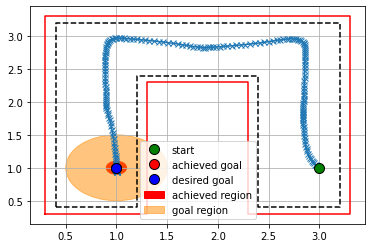

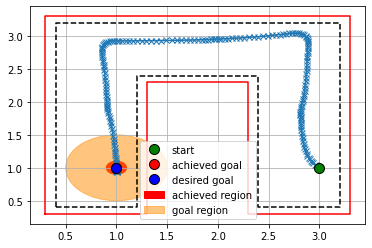

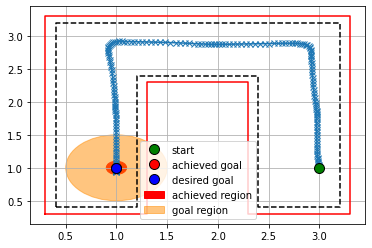

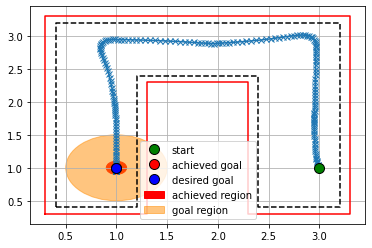

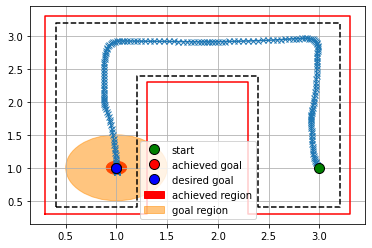

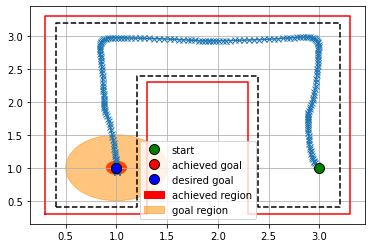

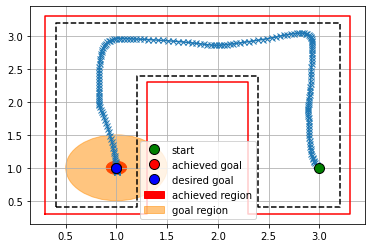

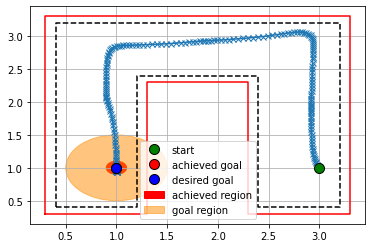

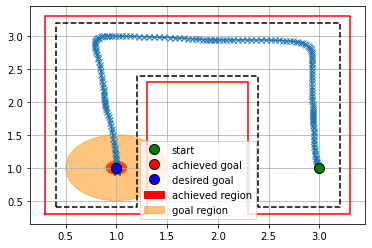

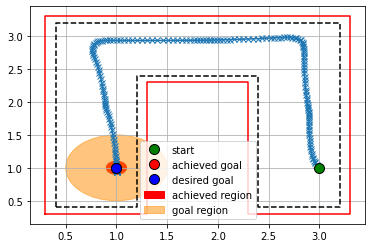

In [7]:


i = 0
for traj in trajectories:
    assert traj.obs[0, 0] == 3 and traj.obs[0,1] == 1
    # print(traj.obs[-1, :], traj.obs[-2, :])
    
    visualize_path_point(traj.obs[:, :2], goal=[1, 1])
    i +=1
    print(traj.obs.shape)
    
    if i == 10:
        break
    
    